In [1]:
% Add path to data, CT images, and solver
addpath(genpath('PROSTATE'));
addpath(genpath('Prostate_Dicom'));
addpath(genpath('minConf'));

In [2]:
%%file compareVoxels2.m
function compareVoxels2(f,struct,term,xa,xb,xc)

c = f.structs{struct}.terms{term}.dose;

da = f.structs{struct}.A*xa;
min_da = min(da);
max_da = max(da);
subplot(1,4,1)
plot(da,'.'), hold on
plot([0 length(da)],[c c])
ylabel('Dose')
title('Our Method Ax')

dw = f.structs{struct}.terms{term}.w + c;
min_dw = min(dw);
max_dw = max(dw);
subplot(1,4,2)
plot(dw,'.'), hold on
plot([0 length(f.structs{struct}.terms{term}.w)],[c c])
xlabel('Index')
title('Our Method W')

db = f.structs{struct}.A*xb;
min_db = min(db);
max_db = max(db);
subplot(1,4,3)
plot(db,'.'), hold on
plot([0 length(db)],[c c])
title('Constraint Generation Ax')

dc = f.structs{struct}.A*xc;
min_dc = min(dc);
max_dc = max(dc);
subplot(1,4,4)
plot(dc,'.'), hold on
plot([0 length(dc)],[c c])
title('conrad Ax')

min_dose = min([min_da, min_dw, min_db, min_dc]);
max_dose = max([max_da, max_dw, max_db, max_dc]);
for i = 1:3
    subplot(1,4,i)
    axis([1 length(da) min_dose max_dose])
end

Created file '/Users/Kelsey/Dropbox (uwamath)/FluenceMapOpt/compareVoxels2.m'.


In [45]:
%%file plotDVHcompare2.m

% Calculate and plot dose-volume histogram of solution, comparing results from two methods.
function plotDVHcompare2(f,xa,xb,xc)

    myLines = lines;

    % Calculate dose-volume histograms
    doses = linspace(0,100,1000);
    dvhInit = zeros(f.nStructs,length(doses));
    dvhFinal_a = zeros(f.nStructs,length(doses));
    dvhFinal_b = zeros(f.nStructs,length(doses));
    dvhFinal_c = zeros(f.nStructs,length(doses));
    for i = 1:f.nStructs
        doseInit = f.structs{i}.A*f.xInit;
        doseFinal_a = f.structs{i}.A*xa;
        doseFinal_b = f.structs{i}.A*xb;
        doseFinal_c = f.structs{i}.A*xc;
        for j = 1:length(doses)
            dvhInit(i,j) = 100*sum(doseInit > doses(j))/f.structs{i}.nVoxels;
            dvhFinal_a(i,j) = 100*sum(doseFinal_a > doses(j))/f.structs{i}.nVoxels;
            dvhFinal_b(i,j) = 100*sum(doseFinal_b > doses(j))/f.structs{i}.nVoxels;
            dvhFinal_c(i,j) = 100*sum(doseFinal_c > doses(j))/f.structs{i}.nVoxels;
        end
    end
    
    % Plot dose-volume histograms
    figure(), hold on
    for i = 1:f.nStructs
        for j = 1:length(f.structs{i}.terms)
            if ~strcmp(f.structs{i}.terms{j}.type,'unif') && f.structs{i}.terms{j}.percent == 0
                plot(f.structs{i}.terms{j}.dose,0,'p','MarkerFaceColor',[0.9290 0.6940 0.1250],...
                    'MarkerEdgeColor',[0.9290 0.6940 0.1250],'MarkerSize',10);
            else
                if strcmp(f.structs{i}.terms{j}.type,'unif')
                    percent = [0 100 100];
                elseif f.structs{i}.terms{j}.percent > 0
                    percent = zeros(1,3);
                    percent(2:3) = f.structs{i}.terms{j}.percent;
                end
                dose = zeros(1,3);
                dose(1:2) = f.structs{i}.terms{j}.dose;
                plot(dose,percent,':','Color',[0.4 0.4 0.4])
                if j == 1
                    plot(doses,dvhInit(i,:),'--','Color',[0.4 0.4 0.4]);
                    if i == 1
                        lineHandle_a = plot(doses,dvhFinal_a(i,:),'Color',myLines(1,:));
                        lineHandle_b = plot(doses,dvhFinal_b(i,:),'Color',myLines(2,:));
                        lineHandle_c = plot(doses,dvhFinal_c(i,:),'Color',myLines(3,:));
                        legendHandles = [lineHandle_a lineHandle_b lineHandle_c]; 
                    else
                        plot(doses,dvhFinal_a(i,:),'Color',myLines(1,:));
                        plot(doses,dvhFinal_b(i,:),'Color',myLines(2,:));
                        plot(doses,dvhFinal_c(i,:),'Color',myLines(3,:));
                    end
                else
                    plot(doses,dvhFinal_a(i,:),'Color',myLines(1,:));
                    plot(doses,dvhFinal_b(i,:),'Color',myLines(2,:));
                    plot(doses,dvhFinal_c(i,:),'Color',myLines(3,:));
                end
            end
        end
    end
    
    legendNames = {'Our Method','Constraint Generation','Convex Relaxation'};
    
    % Annotations
    legend(legendHandles,legendNames,'Location','northeastoutside')
    xlabel('Dose (Gy)')
    ylabel('Relative Volume (%)')
    ax = gca;
    ax.XLim = [0 doses(end)];
    ax.YLim = [0 100];
    box on
    axis square
end

Created file '/Users/Kelsey/Dropbox (uwamath)/FluenceMapOpt/plotDVHcompare2.m'.


## Example 4.1(b)

* Our Method: 54.20 seconds
* Our Method 2: +8.37 seconds
* Constraint Generation: 8.56 seconds
* Constraint Generation 2: 8.61 seconds
* Conrad: 177.08 seconds
* Conrad 2: 145.95 seconds
* Conrad 3: 157.65 seconds

### PTV
* Uniform dose of 81 Gy to prostate

Method | Min | Mean | Median | D95 | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Initialization | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Our Method | 72.59 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.19
Our Method 2 | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Constraint Generation | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Constraint Generation 2 | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Conrad | 53.43 | 80.64 | 80.87 | 76.93 | 94.70 | 3.06 | 253.70
Conrad 2 | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Conrad 3 | 57.59 | 80.71 | 80.90 | 77.58 | 90.11 | 2.44 | 201.80

### OAR
* No more than 30% of rectum volume may exceed 30 Gy

Method | % OAR > 30 | Area
-|-|-
Initialization | 64.14 | 4333.84
Our Method | 33.37 | 2786.89
Our Method 2 | 29.98 | 2624.35
Constraint Generation | 29.98 | 2624.35
Constraint Generation 2 | 28.82 | 2497.81
Conrad | 21.78 | 1991.91
Conrad 2 | 28.82 | 2491.65
Conrad 3 | 24.03 | 2046.95

In [2]:
% Prostate
prostate.name = 'PTV_68';
pt1.type = 'unif'; pt1.dose = 81; pt1.weight = 1;
prostate.terms = {pt1};

% Rectum
rectum.name = 'Rectum';
rt1.type = 'udvc'; rt1.dose = 30; rt1.percent = 30; rt1.weight = 1;
rectum.terms = {rt1};

% Problem parameters
pars.structs = {prostate,rectum};
pars.angles = 0:52:358;
pars.lambda = 1e-8;
pars.maxIter = 500;
pars.overlap = false;
pars.tol = 1e-5;

% Create problem instance
f = FluenceMapOpt(pars);

In [19]:
% Our solution

tic;
f.calcDose();
t = toc;
x_our = f.x;
fprintf('Time: %.2f\n',t)
printStats(f,x_our)

Time: 53.73
Structure: PTV_68
* unif | 72.59 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.19
Structure: Rectum
* udvc | 33.37 | 2786.89


In [21]:
% Constraint generation method

tic;
f.constGen();
t = toc;
x_cgm = f.x;
fprintf('Time: %.2f\n',t)
printStats(f,x_cgm)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 8.61
Structure: PTV_68
* unif | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Structure: Rectum
* udvc | 28.82 | 2497.81


In [9]:
% conrad method

% PTV variables
A_ptv = f.A_unif;
d_ptv = f.d_unif;
n = size(A_ptv,2);
lb = zeros(n,1);

% OAR variables
A_oar = f.structs{2}.A;
d_oar = f.structs{2}.terms{1}.d;
k_up = f.structs{2}.terms{1}.k;
k_lo = f.structs{2}.nVoxels - k_up;

% Non-negative least-squares with relaxed OAR constraint
tic;
lambda = 1;
cvx_begin quiet
    variable x_cp1(n)
    minimize( sum_square(A_ptv*x_cp1 - d_ptv) )
    subject to
        lb <= x_cp1
        sum(pos(1 + lambda*(A_oar*x_cp1 - d_oar))) <= k_up
cvx_end

% Create OAR constraint matrix
oar_dose = A_oar*x_cp1;
[vals,idx] = sort(oar_dose);
A_const = A_oar(idx(1:k_lo),:); % mistake?
d_const = d_oar(idx(1:k_lo)); % mistake?

% Non-negative least-squares with hard OAR constraint
cvx_begin quiet
    variable x_cp2(n)
    minimize( sum_square(A_ptv*x_cp2 - d_ptv) )
    subject to
        lb <= x_cp2
        A_const*x_cp2 <= d_const
cvx_end
t = toc;
fprintf('Time: %.2f\n',t)
printStats(f,x_cp2)

Time: 177.08
Structure: PTV_68
* unif | 53.43 | 80.64 | 80.87 | 76.93 | 94.70 | 3.06 | 253.70
Structure: Rectum
* udvc | 21.78 | 1991.91


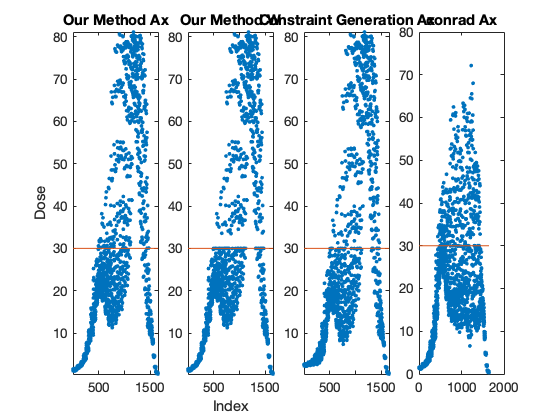

In [8]:
% Compare methods

compareVoxels2(f,2,1,x_our,x_cgm,x_cp2);

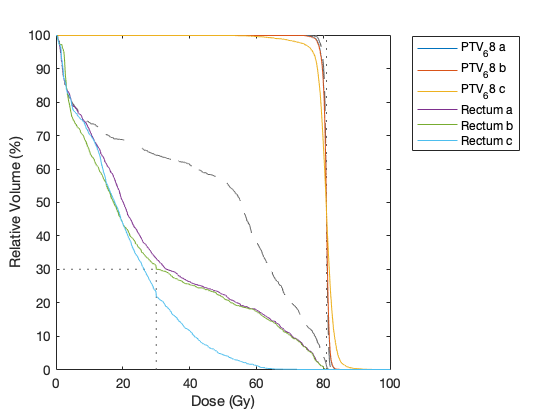

In [12]:
% DVH comparison

plotDVHcompare2(f,x_our,x_cgm,x_cp2)

In [24]:
% Conrad with new function

tic;
f.conrad();
t = toc;
x_cp2 = f.x;
fprintf('Time: %.2f\n',t)
printStats(f,x_cp2)

Time: 157.65
Structure: PTV_68
* unif | 57.59 | 80.71 | 80.90 | 77.58 | 90.11 | 2.44 | 201.80
Structure: Rectum
* udvc | 24.03 | 2046.95


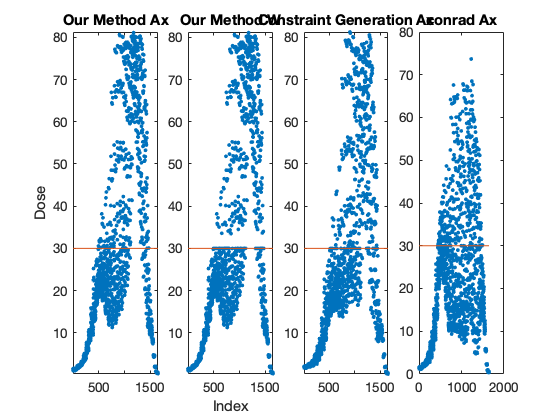

In [26]:
% Compare methods

compareVoxels2(f,2,1,x_our,x_cgm,x_cp2);

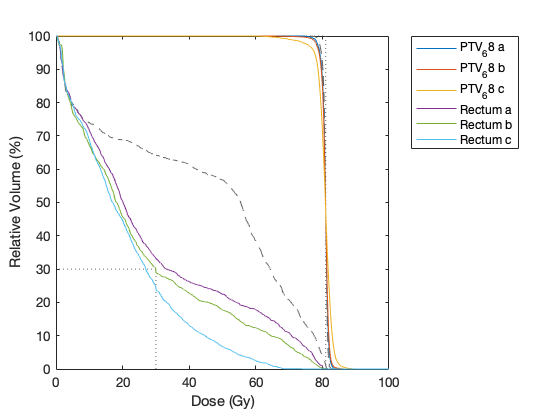

In [25]:
% DVH comparison

plotDVHcompare2(f,x_our,x_cgm,x_cp2)

In [18]:
% conrad still more conservative than needs to be
% we'll need to see the other examples too
% we'll need to test the lower dose-volume constraints
% we'll need to verify notation, constraint definitions
% we'll need to change colors to read plots easier
% write a function that tells agreement between which voxels get constraint
% use the voxels identified in our method to do a hard constraint to compare

In [ ]:
% these functions might be wrong due to which x they are using to create constraints!

In [27]:
% needs some debugging... i feel like re-writing all of the code and creating tests,
% but that'd just take up more time...

In [29]:
tic;
[A_dvc,d_dvc] = f.calcConstMatBig(x_our);
x_our2 = lsqlin(f.A_unif,f.d_unif,A_dvc,d_dvc,[],[],f.lb,f.ub);
t = toc;
fprintf('Time: %.2f\n',t)
printStats(f,x_our2)


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Time: 8.37
Structure: PTV_68
* unif | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Structure: Rectum
* udvc | 29.98 | 2624.35


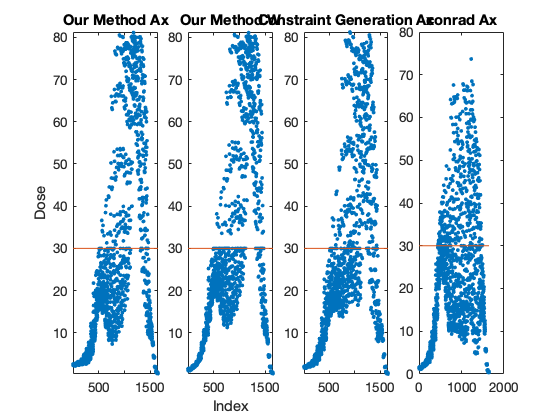

In [30]:
% Compare methods

compareVoxels2(f,2,1,x_our2,x_cgm,x_cp2);

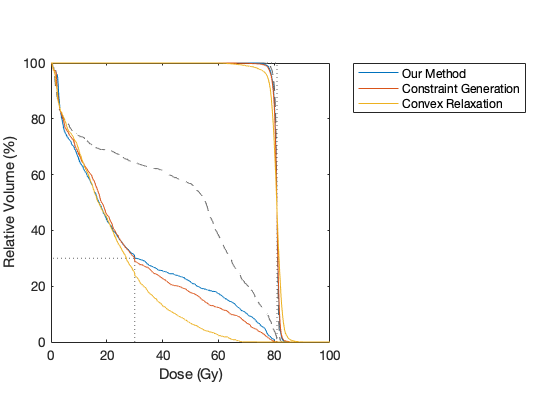

In [47]:
% DVH comparison

plotDVHcompare2(f,x_our2,x_cgm,x_cp2)

In [32]:
% Our method has more flexibility to choose which voxels should have max dose constraints,
% so doesn't necessarily end up at same local minimum

In [ ]:
% what would happen if we added the relu inside the oar objective term? would it be hard to implement?

In [48]:
% compare minconf_tmp to lsqlin and quadprog